Google Colab Link : https://colab.research.google.com/github/SmayanKulkarni/AI-and-ML-Course/blob/master/ML-LAB/ML_exp_3ipynb.ipynb#scrollTo=M3xp25eMSRpA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_comparison={}

In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior



def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y


def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]

    prior = calculate_prior(df, Y)

    Y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [4]:
df = pd.read_csv('/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/ML-LAB/diabetes.csv')

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
X = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]].values
y = df.iloc[:, -1].values

In [7]:
X

array([[148.   ,  72.   ,  35.   , ...,   0.627,  50.   ,   1.   ],
       [ 85.   ,  66.   ,  29.   , ...,   0.351,  31.   ,   0.   ],
       [183.   ,  64.   ,   0.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,   0.245,  30.   ,   0.   ],
       [126.   ,  60.   ,   0.   , ...,   0.349,  47.   ,   1.   ],
       [ 93.   ,  70.   ,  31.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
train, test = train_test_split(df, test_size=.2, random_state=41)

X_test_acc = test.iloc[:,:-1].values
Y_test_acc = test.iloc[:,-1].values

In [10]:
Y_pred_acc = naive_bayes_gaussian(train, X=X_test_acc, Y="Outcome")

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test_acc, Y_pred_acc)
ac = accuracy_score(Y_test_acc,Y_pred_acc)

Accuracy on Diabetes dataset: 0.525974025974026


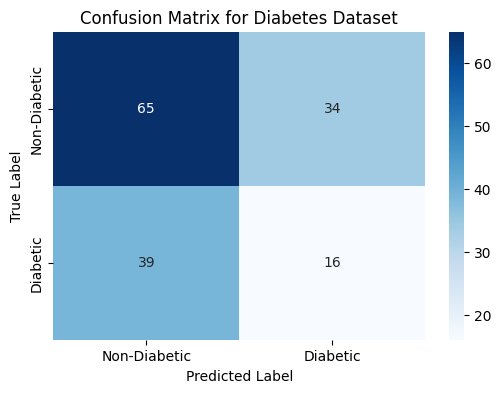

In [ ]:
cm = confusion_matrix(y_test, Y_pred_acc)

print("Accuracy on Diabetes dataset:", accuracy_score(y_test, Y_pred_acc))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Diabetes Dataset")
plt.show()

In [13]:
ac

0.7467532467532467

In [ ]:
from sklearn.naive_bayes import GaussianNB


df = pd.read_csv("Breast_cancer_data.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy on Breast Cancer dataset:", accuracy_score(y_test, y_pred))


Accuracy on Breast Cancer dataset: 0.9298245614035088


Accuracy on Breast Cancer dataset: 0.9298245614035088


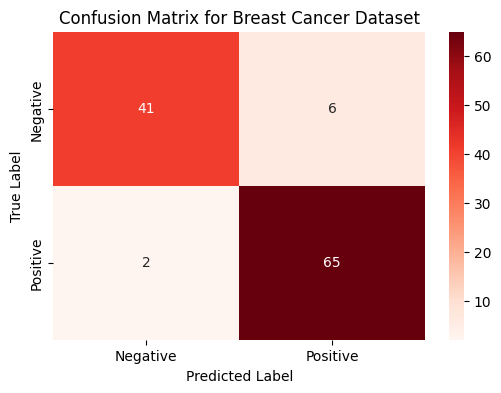

In [15]:
cm = confusion_matrix(y_test, y_pred)


print("Accuracy on Breast Cancer dataset:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Breast Cancer Dataset")
plt.show()


In [16]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 


df = pd.read_csv("Social_Network_Ads.csv")

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = BernoulliNB()
model.fit(X_train, y_train)

 
y_pred = model.predict(X_test)

print("Accuracy on Social Network Ads dataset:", accuracy_score(y_test, y_pred))

Accuracy on Social Network Ads dataset: 0.825


Accuracy on Social Network Ads dataset: 0.825


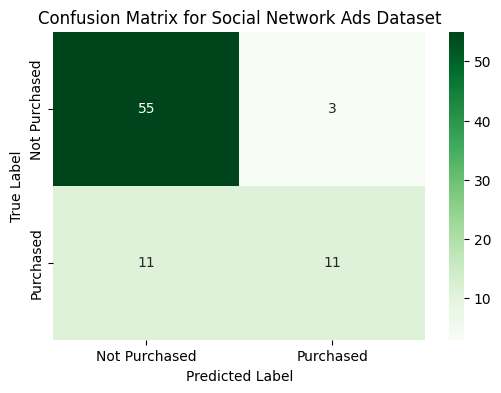

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print("Accuracy on Social Network Ads dataset:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Not Purchased", "Purchased"], yticklabels=["Not Purchased", "Purchased"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Social Network Ads Dataset")
plt.show()